## BUSINESS UNDERSTANDING


### BUSINESS OBJECTIVES

#### PROBLEM STATEMENT
In Tanzania, water wells become non-functional due to various factors such as poor installation, pump type, or environmental conditions. Identifying wells at risk of failure can help prioritize maintenance efforts and improve water infrastructure planning. This analysis aims to develop a machine learning classifier that predicts the condition of water wells based on features like pump type, installation year, and other relevant factors. The model will categorize wells as functional or non-functional.

#### BUSINESS QUESTIONS
This project aims to answer the following questions:
1. What factors contribute most to well failures?
2. Which wells are most likely to fail in the near future?
3. Which regions have the highest concentration of non-functional wells?
4. How does the installation year affect well failure rates?
5. Is there a correlation between well failure and water quality issues?

#### EXPECTED BENEFITS
The expected benefits for this analysis is to be able to:
1. Enable the Tanzanian government to proactively prevent well failures instead of reacting.
2. Enable proactive maintenance by identifying high-risk wells.
3. Help the government target interventions in regions with high failure rates.
4. Provide insights into lifespan of wells, and help schedule replacements for aging wells before failure occurs.
5. Identify if water quality problems contribute to mechanical failures.

### BUSINESS SUCCESS CRITERIA 
1. A well-performing model (high accuracy, recall, F1-score) that correctly identifies the condition of water wells.  
2. A model that will help the government of Tanzania prioritize repairs, optimize resources, and improve well longevity.  

## DATA UNDERSTANDING

### SOURCE AND BRIEF DESCRIPTION
The source of the data sets used in this analysis are from http://taarifa.org/ and http://maji.go.tz/. They contain attributes pertaining to water points supplying clean and potable water across Tanzania. The data was split into three - training set values, test set values and training set labels - for the purpose of an online competition. For the scope of this analysis, the training set and its labels will be merged into a single dataset, allowing for greater control over the direction of the investigation. The test data will be used later to test model performance. 

### CONDITION OF THE DATA
Loading the data before checking its condition:

In [248]:
# Importing libraries
import pandas as pd
import geopandas as gpd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [249]:
# Reading the datasets
label_df = pd.read_csv('0bf8bc6e-30d0-4c50-956a-603fc693d966.csv')
test_df = pd.read_csv('702ddfc5-68cd-4d1d-a0de-f5f566f76d91.csv')
train_df = pd.read_csv('4910797b-ee55-40a7-8668-10efd5c1b960.csv')

In [250]:
label_df.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [251]:
label_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            59400 non-null  int64 
 1   status_group  59400 non-null  object
dtypes: int64(1), object(1)
memory usage: 928.3+ KB


In [252]:
label_df.describe()

,id
count,59400.000000
mean,37115.131768
std,21453.128371
min,0.000000
25%,18519.750000
50%,37061.500000
75%,55656.500000
max,74247.000000


In [253]:
label_df.shape

(59400, 2)

In [254]:
test_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [255]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14850 non-null  int64  
 1   amount_tsh             14850 non-null  float64
 2   date_recorded          14850 non-null  object 
 3   funder                 13980 non-null  object 
 4   gps_height             14850 non-null  int64  
 5   installer              13973 non-null  object 
 6   longitude              14850 non-null  float64
 7   latitude               14850 non-null  float64
 8   wpt_name               14850 non-null  object 
 9   num_private            14850 non-null  int64  
 10  basin                  14850 non-null  object 
 11  subvillage             14751 non-null  object 
 12  region                 14850 non-null  object 
 13  region_code            14850 non-null  int64  
 14  district_code          14850 non-null  int64  
 15  lg

In [256]:
test_df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,14850.000000,14850.000000,14850.000000,14850.000000,1.485000e+04,14850.000000,14850.000000,14850.000000,14850.000000,14850.000000
mean,37161.972929,322.826983,655.147609,34.061605,-5.684724e+00,0.415084,15.139057,5.626397,184.114209,1289.708350
std,21359.364833,2510.968644,691.261185,6.593034,2.940803e+00,8.167910,17.191329,9.673842,469.499332,955.241087
min,10.000000,0.000000,-57.000000,0.000000,-1.156459e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18727.000000,0.000000,0.000000,33.069455,-8.443970e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37361.500000,0.000000,344.000000,34.901215,-5.049750e+00,0.000000,12.000000,3.000000,20.000000,1986.000000
75%,55799.750000,25.000000,1308.000000,37.196594,-3.320594e+00,0.000000,17.000000,5.000000,220.000000,2004.000000
max,74249.000000,200000.000000,2777.000000,40.325016,-2.000000e-08,669.000000,99.000000,80.000000,11469.000000,2013.000000


In [257]:
test_df.shape

(14850, 40)

In [258]:
train_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [259]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [260]:
train_df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [261]:
train_df.shape

(59400, 40)

In [262]:
train_df.columns


Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

From the above, there is uniformity in the three data sets in that all have 40 columns. The columns in train_df are similar to those in test_df. Promising features that could contribute to answering our business questions include 'construction_year','extraction_type','management','water_quality' and 'quantity'. From the shapes, the initial dataset was split using the ratio 80%:20%

## DATA PREPARATION

### FEATURE ENGINEERING

### MERGING
We shall start by merging the train_df with its corresponding labels. This way, when we drop rows with null values, the corresponding labels will also be removed, ensuring that our data and labels remain aligned.

In [263]:
# Merging the train_df and label datasets
train_df = pd.merge(train_df, label_df, on='id')
train_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


### DATA CLEANING

In [264]:
# From the data head, we spot some redundant columns i.e quantity and quantity group, source and source_type, waterpoint type and waterpoint type group
# To investigate this, let us narrow them down into their own dataframe
redundant_cols = ['region', 'region_code', 'district_code', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group',
                   'payment', 'payment_type','water_quality', 'quality_group', 'quantity', 'quantity_group', 'source', 
                   'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group','scheme_management', 'scheme_name']
redundant_cols_df = train_df[redundant_cols]
redundant_cols_df.head(20)

,region,region_code,district_code,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,...,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,scheme_management,scheme_name
0,Iringa,11,5,gravity,gravity,gravity,vwc,user-group,pay annually,annually,...,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,VWC,Roman
1,Mara,20,2,gravity,gravity,gravity,wug,user-group,never pay,never pay,...,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,Other,NaN
2,Manyara,21,4,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,...,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,VWC,Nyumba ya mungu pipe scheme
3,Mtwara,90,63,submersible,submersible,submersible,vwc,user-group,never pay,never pay,...,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,VWC,NaN
4,Kagera,18,1,gravity,gravity,gravity,other,other,never pay,never pay,...,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,NaN,NaN
5,Tanga,4,8,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket,...,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe,VWC,Zingibali
6,Shinyanga,17,3,swn 80,swn 80,handpump,vwc,user-group,never pay,never pay,...,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,VWC,NaN
7,Shinyanga,17,3,nira/tanira,nira/tanira,handpump,wug,user-group,unknown,unknown,...,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,NaN,NaN
8,Tabora,14,6,india mark ii,india mark ii,handpump,vwc,user-group,never pay,never pay,...,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump,VWC,NaN
9,Kagera,18,1,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,...,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,NaN,NaN


From the above, we can tell that the columns are giving pretty much the same information. Let us solidify this futher by checking the correlation between the columns

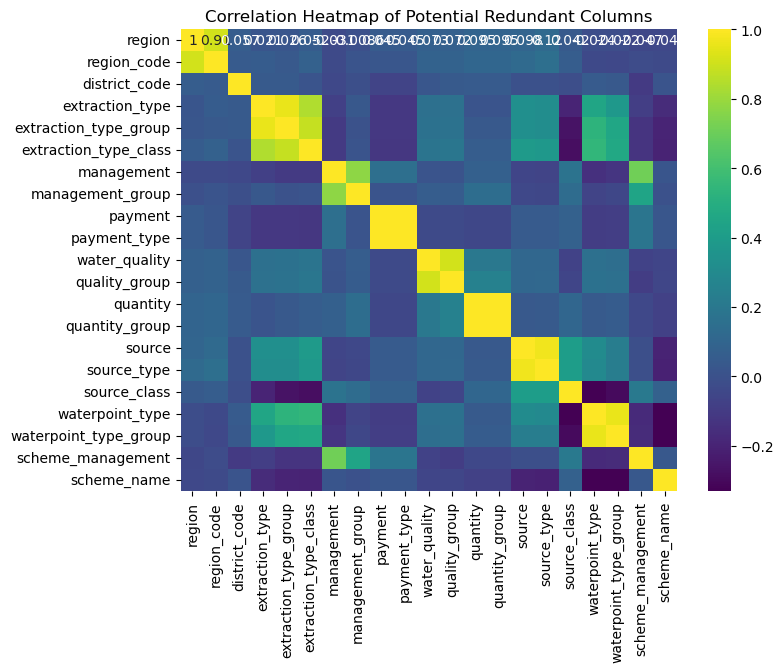

In [265]:
# Plotting a heat map
plt.figure(figsize=(8,6))
sns.heatmap(train_df[redundant_cols].apply(lambda x: pd.factorize(x)[0]).corr(), annot=True, cmap="viridis")
plt.title("Correlation Heatmap of Potential Redundant Columns")
plt.show()

From the above, we can clearly tell that the suspected columns are very highly correlated with each other.

In [266]:
# Dropping duplicated columns
train_df.drop(columns=['region_code', 'district_code', 'extraction_type_group', 'extraction_type_class', 'management', 'payment', 'quality_group',
                        'quantity_group', 'source_type', 'source_class', 'waterpoint_type_group'], inplace=True)

In [267]:
# Majority of the data in the num_private column is 0.
train_df['num_private'].value_counts()

# As a result, we will drop this column
train_df.drop(columns='num_private', inplace=True)

In [268]:
train_df.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'basin', 'subvillage',
       'region', 'lga', 'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'management_group', 'payment_type', 'water_quality',
       'quantity', 'source', 'waterpoint_type', 'status_group'],
      dtype='object')

In [269]:
# Dropping columns that will not contribute to this analysis
train_df.drop(columns=['id', 'date_recorded'], inplace=True)

In [270]:
train_df.shape

(59400, 27)

In [271]:
# Checking for missing values
train_df.isnull().sum()

amount_tsh               0
funder                3637
gps_height               0
installer             3655
longitude                0
latitude                 0
wpt_name                 2
basin                    0
subvillage             371
region                   0
lga                      0
ward                     0
population               0
public_meeting        3334
recorded_by              0
scheme_management     3878
scheme_name          28810
permit                3056
construction_year        0
extraction_type          0
management_group         0
payment_type             0
water_quality            0
quantity                 0
source                   0
waterpoint_type          0
status_group             0
dtype: int64

In [272]:
# Inspecting 'funder' column
train_df['funder'].value_counts().head(10)

funder
Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
Kkkt                      1287
World Vision              1246
Unicef                    1057
Tasaf                      877
District Council           843
Name: count, dtype: int64

In [273]:
# Inspecting 'installer' column
train_df['installer'].value_counts().head(10)

installer
DWE                   17402
Government             1825
RWE                    1206
Commu                  1060
DANIDA                 1050
KKKT                    898
Hesawa                  840
0                       777
TCRS                    707
Central government      622
Name: count, dtype: int64

In [274]:
# Since we cannot predict unknown values for 'funder' and 'installer' column, we will fill them with 'Unknown'
train_df['funder'].fillna('Unknown', inplace=True)
train_df['installer'].fillna('Unknown', inplace=True)
train_df.isnull().sum()

amount_tsh               0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 2
basin                    0
subvillage             371
region                   0
lga                      0
ward                     0
population               0
public_meeting        3334
recorded_by              0
scheme_management     3878
scheme_name          28810
permit                3056
construction_year        0
extraction_type          0
management_group         0
payment_type             0
water_quality            0
quantity                 0
source                   0
waterpoint_type          0
status_group             0
dtype: int64

In [275]:
# Inspecting 'wpt_name' column
train_df['wpt_name'].value_counts()

wpt_name
none                       3563
Shuleni                    1748
Zahanati                    830
Msikitini                   535
Kanisani                    323
                           ... 
Kwa Medadi                    1
Kwa Kubembeni                 1
Shule Ya Msingi Milanzi       1
Funua                         1
Kwa Mzee Lugawa               1
Name: count, Length: 37399, dtype: int64

In [276]:
# There is a 'none' value in the 'wpt_name' column has the most values meaning that many water points do not have names. Thus it is safe to assign the missing
# values for 'wpt_name' to this value
train_df['wpt_name'].fillna('none', inplace=True)

In [277]:
# We can replace this none value with a more comprehensive value 'Nameless'
train_df['wpt_name'].replace('none', 'Nameless', inplace=True)

In [278]:
# Inspecting 'subvillage' column
train_df['subvillage'].value_counts()

subvillage
Madukani        508
Shuleni         506
Majengo         502
Kati            373
Mtakuja         262
               ... 
Kipompo           1
Chanyamilima      1
Ikalime           1
Kemagaka          1
Kikatanyemba      1
Name: count, Length: 19287, dtype: int64

In [279]:
# From the above, there is no subvillage that stands out as an outlier. Therefore, we cannot make any meaningful assumptions. This means that we have to drop the missing values. 
# There is also a subvillage that has a value of 'M', which appears to be an anomaly. However, the frequency of its occurrence 
# suggests that it may actually represent a legitimate subvillage, thus we will not remove it.
train_df = train_df.dropna(subset=['subvillage'])

In [280]:
# Inspecting 'public_meeting' column
train_df['public_meeting'].value_counts()

public_meeting
True     50642
False     5054
Name: count, dtype: int64

In [281]:
# 'public_meeting' is a boolean column heavily dominated by True. Since we can not accurately predict unknown values, we will drop the missing values
train_df = train_df.dropna(subset=['public_meeting'])

In [282]:
# Inspecting 'scheme_management' column
train_df['scheme_management'].value_counts()

scheme_management
VWC                 35207
WUG                  4392
Water authority      3124
WUA                  2862
Water Board          2709
Parastatal           1468
Company              1057
Private operator      817
Other                 434
SWC                    97
Trust                  72
Name: count, dtype: int64

In [283]:
# Inspecting 'scheme_name' column
train_df['scheme_name'].value_counts()

scheme_name
K                                  676
Borehole                           546
Chalinze wate                      404
M                                  345
Ngana water supplied scheme        270
                                  ... 
Magula Mwanyumba                     1
Jumwia ya wa tumia maji Vumamti      1
Bl Aziz water supply                 1
Mtikanga supply scheme               1
Mtawanya                             1
Name: count, Length: 2616, dtype: int64

In [284]:
# Since we cannot predict unknown values for 'scheme_name' and 'scheme_management' column, we will fill them with 'Unknown'
train_df['scheme_name'].fillna('Unknown', inplace=True)
train_df['scheme_management'].fillna('Unknown', inplace=True)
train_df.isnull().sum()

amount_tsh              0
funder                  0
gps_height              0
installer               0
longitude               0
latitude                0
wpt_name                0
basin                   0
subvillage              0
region                  0
lga                     0
ward                    0
population              0
public_meeting          0
recorded_by             0
scheme_management       0
scheme_name             0
permit               2785
construction_year       0
extraction_type         0
management_group        0
payment_type            0
water_quality           0
quantity                0
source                  0
waterpoint_type         0
status_group            0
dtype: int64

In [285]:
# Inspecting 'permit' column
train_df['permit'].value_counts()

permit
True     36996
False    15915
Name: count, dtype: int64

In [286]:
# Since 'permit' is a boolean column, we can not accurately predict unknown values. Therefore, we will drop the missing values
train_df = train_df.dropna(subset=['permit'])

In [287]:
train_df.isnull().sum()

amount_tsh           0
funder               0
gps_height           0
installer            0
longitude            0
latitude             0
wpt_name             0
basin                0
subvillage           0
region               0
lga                  0
ward                 0
population           0
public_meeting       0
recorded_by          0
scheme_management    0
scheme_name          0
permit               0
construction_year    0
extraction_type      0
management_group     0
payment_type         0
water_quality        0
quantity             0
source               0
waterpoint_type      0
status_group         0
dtype: int64

There are no more missing values.

In [288]:
train_df.shape

# We lost 10% of the data by dropping the missing values while cleaning.

(52911, 27)

In [289]:
# Checking for duplicates
train_df.duplicated().sum()

38

There are no duplicated values.

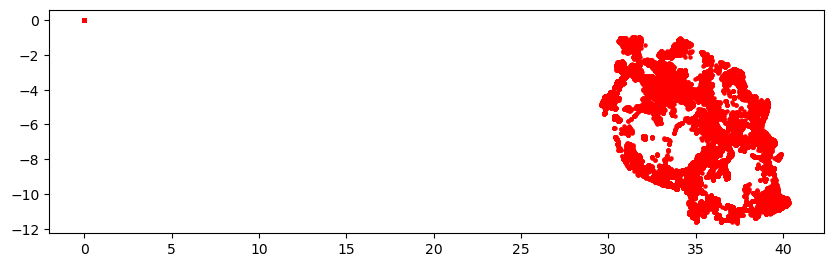

In [290]:
# Checking for outliers in the Longitude and Latitude columns
# Convert DataFrame to GeoDataFrame
gdf = gpd.GeoDataFrame(train_df, geometry=gpd.points_from_xy(train_df.longitude, train_df.latitude))
# Plot
gdf.plot(figsize=(10,6), marker='o', color='red', markersize=5)
plt.show()


We can see that there is an outlier with coordinates 0,0. We can remove this point.

In [291]:
# Dropping columns with latitude and longitude = 0
train_df = train_df[train_df['latitude'] != 0]
train_df = train_df[train_df['longitude'] != 0]
train_df.shape

(51457, 27)

In [292]:
# Checking for outlier in the construction year column
train_df['construction_year'].value_counts().sort_index().head()

construction_year
0       16765
1960       39
1961       20
1962       28
1963       84
Name: count, dtype: int64

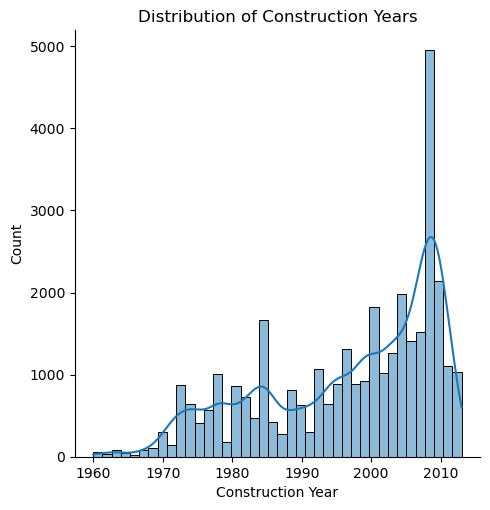

In [293]:
# Checking on the distribution of the construction years excluding year 0
construction_year_df = train_df[train_df['construction_year'] != 0]
sns.displot(construction_year_df['construction_year'], kde=True)
plt.xlabel('Construction Year')
plt.title('Distribution of Construction Years')
plt.show()

Since almost 30% of the data in the construction_year column are 0, let us consider replacing these values with median values of construction_year per sub-villages. This approach is based on the assumption that construction years of wells are similar within regions, and even much more similar within subvillages due to government planning or NGO interventions. To verify this approach, first let us investigate the construction year distributions by subvillage.

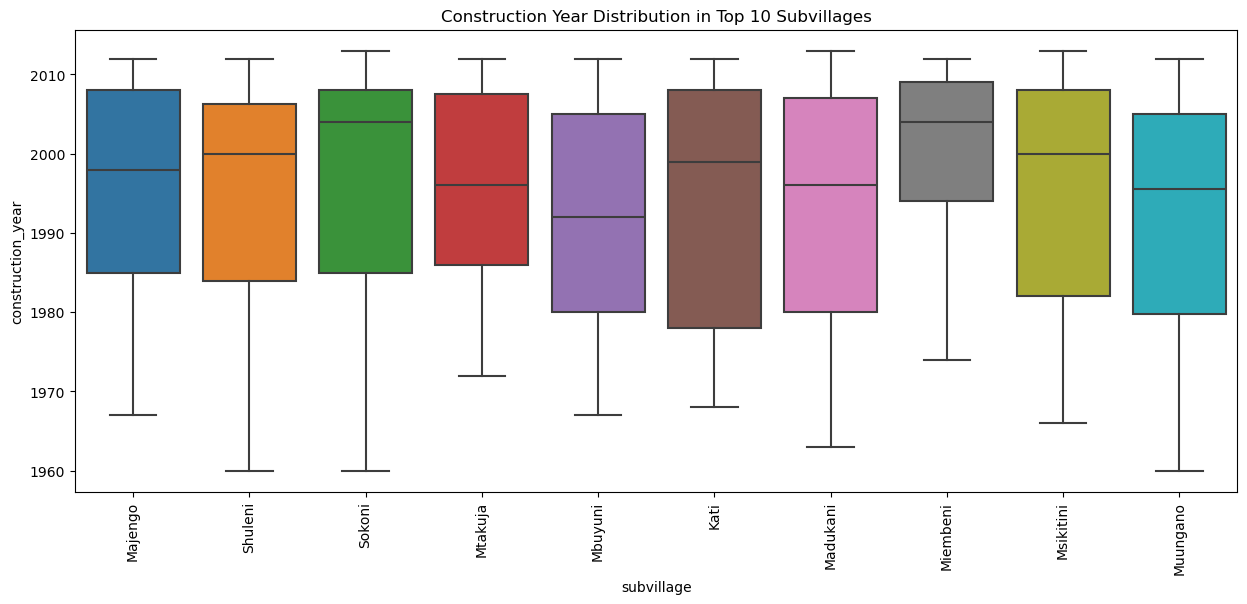

In [294]:
# Plot for construction years in top 10 subvillages
plt.figure(figsize=(15,6))
top_subvillages = construction_year_df['subvillage'].value_counts().index[:10] 
sns.boxplot(x='subvillage', y='construction_year', data=construction_year_df[construction_year_df['subvillage'].isin(top_subvillages)])
plt.xticks(rotation=90)
plt.title("Construction Year Distribution in Top 10 Subvillages")
plt.show()

In [295]:
# Since the spread within each subvillage relatively narrow, using the median construction year per subvillage is a reasonable approach for filling in missing values.
# Replacing 0 with the median per subvillage. If a subvillage contains only zeros, we will replace 0 with the median of the entire dataset
train_df['construction_year'] = train_df.groupby('subvillage')['construction_year'].transform(
    lambda x: x.replace(0, x[x > 0].median() if not x[x > 0].empty else train_df['construction_year'].median())
)


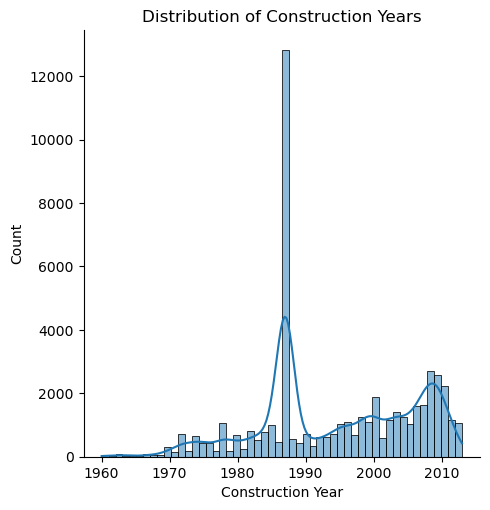

In [296]:
# Checking on the distribution of the construction years after replacement
sns.displot(train_df['construction_year'], kde=True)
plt.xlabel('Construction Year')
plt.title('Distribution of Construction Years')
plt.show()


In [297]:
# investigating the distribution of the amount_tsh column
train_df['amount_tsh'].value_counts().sort_index()

amount_tsh
0.0         34604
0.2             3
1.0             3
2.0            13
5.0           375
            ...  
117000.0        7
138000.0        1
170000.0        1
200000.0        1
250000.0        1
Name: count, Length: 91, dtype: int64

The column amount_tsh has a lot of zero values, which doesnt make sense. We will replace the 0s with the mode of the entire dataset, as the mode represents what well construction usually costs.

In [298]:
# First calculating the mode for amount_tsh excluding zeros
mode_amount_tsh = train_df[train_df['amount_tsh'] != 0]['amount_tsh'].mode()[0]
mode_count = (train_df['amount_tsh'] == mode_amount_tsh).sum()
print(f"Mode Value: {mode_amount_tsh}, Count: {mode_count}")

Mode Value: 500.0, Count: 3028


In [299]:
# Replacing zeros with the mode
train_df['amount_tsh'] = train_df['amount_tsh'].replace(0, mode_amount_tsh)

### EXPLORATORY DATA ANALYSIS

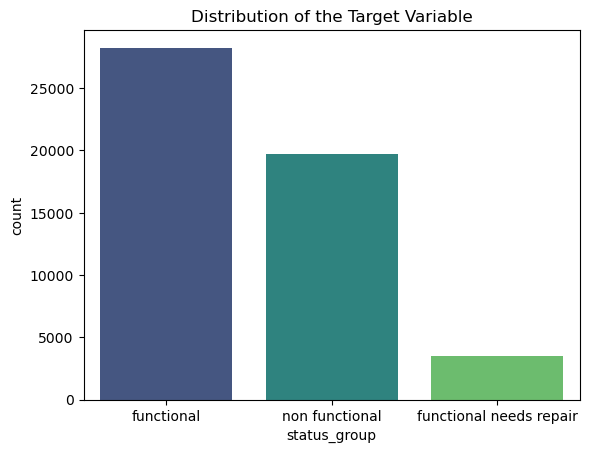

In [300]:
# Using a bar graph, we can check the distribution of the target variable
sns.countplot(x='status_group', data=train_df, palette='viridis')
plt.title('Distribution of the Target Variable')
plt.show()


The majority of the wells are functional, with a distribution of approximately 3:2 between functional and non-functional wells. Additionally, about one-twelfth of the wells are functional but require repair.

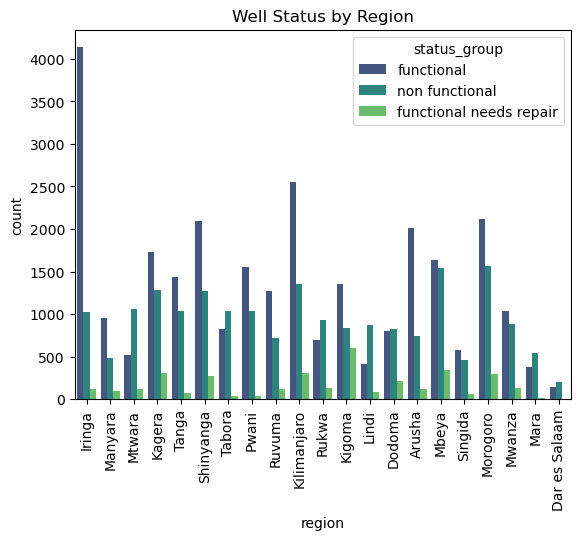

In [301]:
sns.countplot(data=train_df, x='region', hue='status_group', palette='viridis')
plt.xticks(rotation=90)
plt.title('Well Status by Region')
plt.show()


We can see that Iringa has the highest number of functioning wells followed by Kilimanjaro then Shinyanga. The highest number of non-functional wells are in Morogoro and Mbeya.

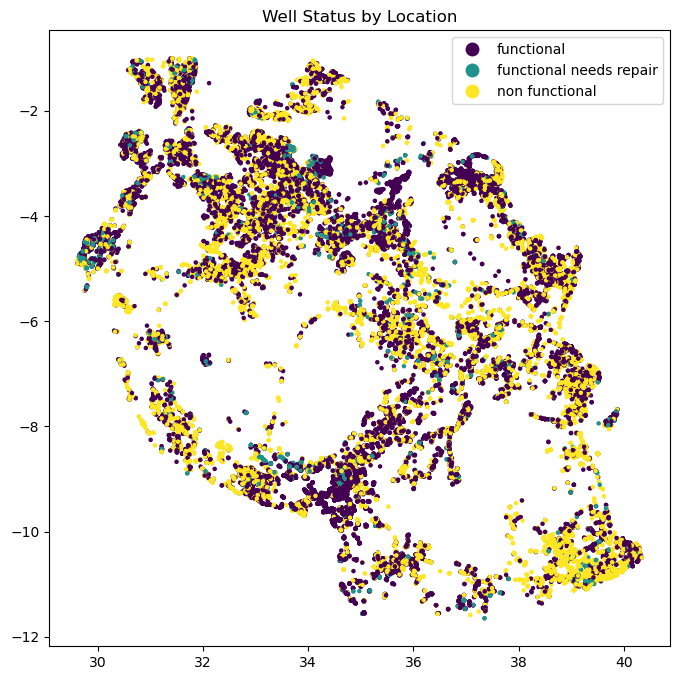

In [302]:
# Checking the map again and adding hue for status_group
gdf = gpd.GeoDataFrame(train_df, geometry=gpd.points_from_xy(train_df.longitude, train_df.latitude))
gdf.plot(figsize=(10,8), marker='o', column='status_group', cmap='viridis', legend=True, markersize=5)
plt.title('Well Status by Location')
plt.show()

This shows the data in the shape of Tanzania! The plot shows the distribution of wells based on the target variable. We can see a very even distribution throughout. We can also spot some areas in the map that do not have wells.

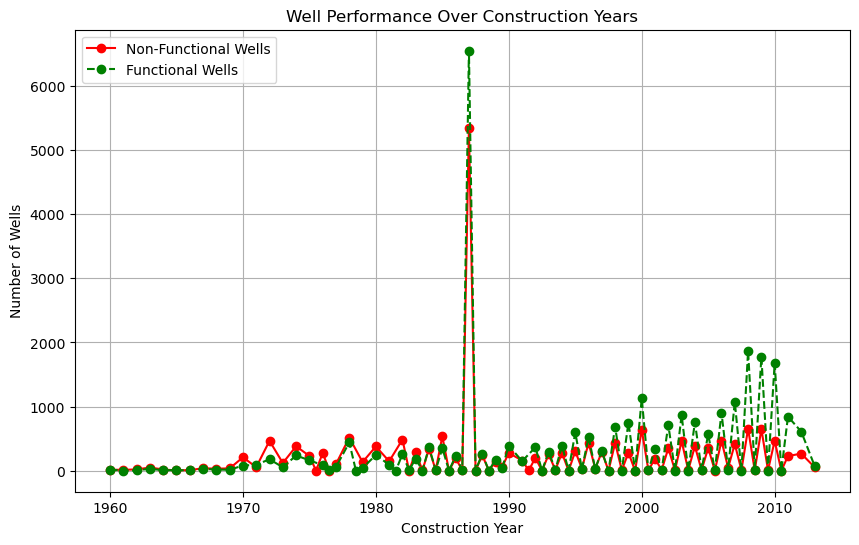

In [303]:
# Checking the trend of well performance over time
# Filter by status group
non_functional_wells_per_year = train_df[train_df['status_group'] == 'non functional'].groupby('construction_year').size()
functional_wells_per_year = train_df[train_df['status_group'] == 'functional'].groupby('construction_year').size()

# Plotting a line graph
plt.figure(figsize=(10,6))
plt.plot(non_functional_wells_per_year.index, non_functional_wells_per_year.values, marker='o', linestyle='-', color='red', label='Non-Functional Wells')
plt.plot(functional_wells_per_year.index, functional_wells_per_year.values, marker='o', linestyle='--', color='green', label='Functional Wells')
plt.xlabel('Construction Year')
plt.ylabel('Number of Wells')
plt.title('Well Performance Over Construction Years')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()



The plot shows an increasing trend in well construction, peaking around 2010, with functional wells consistently outnumbering non-functional ones. However, well failures rise over time, possibly due to aging infrastructure or maintenance issues.

In [304]:
train_df.head()

,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,region,...,permit,construction_year,extraction_type,management_group,payment_type,water_quality,quantity,source,waterpoint_type,status_group
0,6000.0,Roman,1390,Roman,34.938093,-9.856322,Nameless,Lake Nyasa,Mnyusi B,Iringa,...,False,1999.0,gravity,user-group,annually,soft,enough,spring,communal standpipe,functional
2,25.0,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,Pangani,Majengo,Manyara,...,True,2009.0,gravity,user-group,per bucket,soft,enough,dam,communal standpipe multiple,functional
3,500.0,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,Mtwara,...,True,1986.0,submersible,user-group,never pay,soft,dry,machine dbh,communal standpipe multiple,non functional
4,500.0,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,Lake Victoria,Kyanyamisa,Kagera,...,True,1987.0,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,functional
5,20.0,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,Pangani,Moa/Mwereme,Tanga,...,True,2009.0,submersible,user-group,per bucket,salty,enough,other,communal standpipe multiple,functional


## PRE-PROCESSING

### ENCODING

In [305]:
# Creating a copy of the data
clean_df = train_df.copy()

In [306]:
# Creating a dataframe with the numeric cols and the categorical columns
number_columns = clean_df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = clean_df.select_dtypes(exclude=np.number).columns.tolist()

print("Categorical columns:", categorical_cols)
print("Number columns:", number_columns)

Categorical columns: ['funder', 'installer', 'wpt_name', 'basin', 'subvillage', 'region', 'lga', 'ward', 'public_meeting', 'recorded_by', 'scheme_management', 'scheme_name', 'permit', 'extraction_type', 'management_group', 'payment_type', 'water_quality', 'quantity', 'source', 'waterpoint_type', 'status_group']
Number columns: ['amount_tsh', 'gps_height', 'longitude', 'latitude', 'population', 'construction_year']


In [307]:
# Checking number of unique values in the categorical columns
for i in categorical_cols:
  print(f'The variable "{i}" has {clean_df[i].nunique()} variables: {clean_df[i].unique()} \n')

The variable "funder" has 1687 variables: ['Roman' 'Lottery Club' 'Unicef' ... 'Dwe/anglican Church' 'Brown' 'Samlo'] 

The variable "installer" has 1885 variables: ['Roman' 'World vision' 'UNICEF' ... 'DWE/Anglican church' 'brown'
 'SELEPTA'] 

The variable "wpt_name" has 33202 variables: ['Nameless' 'Kwa Mahundi' 'Zahanati Ya Nanyumbu' ... 'Kwa Yahona Kuvala'
 'Mshoro' 'Kwa Mzee Lugawa'] 

The variable "basin" has 9 variables: ['Lake Nyasa' 'Pangani' 'Ruvuma / Southern Coast' 'Lake Victoria'
 'Internal' 'Lake Tanganyika' 'Wami / Ruvu' 'Rufiji' 'Lake Rukwa'] 

The variable "subvillage" has 17069 variables: ['Mnyusi B' 'Majengo' 'Mahakamani' ... 'Itete B' 'Maore Kati'
 'Kikatanyemba'] 

The variable "region" has 21 variables: ['Iringa' 'Manyara' 'Mtwara' 'Kagera' 'Tanga' 'Shinyanga' 'Tabora' 'Pwani'
 'Ruvuma' 'Kilimanjaro' 'Rukwa' 'Kigoma' 'Lindi' 'Dodoma' 'Arusha' 'Mbeya'
 'Singida' 'Morogoro' 'Mwanza' 'Mara' 'Dar es Salaam'] 

The variable "lga" has 120 variables: ['Ludewa' 'Simanjir

In [308]:
# Combining the functional and functional needs repair values in the status_group to get a binary target variable
clean_df['status_group'] = clean_df['status_group'].replace(['functional needs repair', 'functional'], 'functional')
clean_df['status_group'].value_counts()

status_group
functional        31746
non functional    19711
Name: count, dtype: int64

In [309]:
# Create a copy of the data
df_encoded = clean_df.copy()

In [310]:
# Dropping columns due to high cardinality
df_encoded.drop(columns=["scheme_name", "recorded_by",  "ward", "lga", "region", "subvillage", "wpt_name", "installer", "funder"], inplace=True)

In [311]:
# Import sklearn for label encoding
from sklearn.preprocessing import LabelEncoder

# 1. Label Encoding for Binary Columns (True/False)
binary_cols = ['public_meeting', 'permit']
for col in binary_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

# 2. Ordinal Encoding for Ordered Categories
df_encoded['status_group'] = df_encoded['status_group'].map({'low': 0, 'high': 1})


# 3. One-Hot Encoding for Nominal Categorical Variables with Low Cardinality
one_hot_cols = ['basin', 'management_group', 'payment_type', 'water_quality', 'quantity', 'source', 'waterpoint_type']
df_encoded = pd.get_dummies(df_encoded, columns=one_hot_cols, drop_first=True)

# 4. Frequency Encoding for High-Cardinality Columns
high_cardinality_cols = ['scheme_management', 'extraction_type']
for col in high_cardinality_cols:
    freq_map = df_encoded[col].value_counts(normalize=True)
    df_encoded[col] = df_encoded[col].map(freq_map)

# Check info for the encoded dataset
df_encoded.info()


<class 'pandas.core.frame.DataFrame'>
Index: 51457 entries, 0 to 59399
Data columns (total 55 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   amount_tsh                                   51457 non-null  float64
 1   gps_height                                   51457 non-null  int64  
 2   longitude                                    51457 non-null  float64
 3   latitude                                     51457 non-null  float64
 4   population                                   51457 non-null  int64  
 5   public_meeting                               51457 non-null  int32  
 6   scheme_management                            51457 non-null  float64
 7   permit                                       51457 non-null  int32  
 8   construction_year                            51457 non-null  float64
 9   extraction_type                              51457 non-null  float64
 10  sta

In [312]:
# Convert boolean columns to numeric (0 and 1)
for col in df_encoded.select_dtypes(include='bool'):
    df_encoded[col] = df_encoded[col].astype(int)
df_encoded.head()

,amount_tsh,gps_height,longitude,latitude,population,public_meeting,scheme_management,permit,construction_year,extraction_type,...,source_river,source_shallow well,source_spring,source_unknown,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other
0,6000.0,1390,34.938093,-9.856322,109,1,0.632606,0,1999.0,0.468819,...,0,0,1,0,1,0,0,0,0,0
2,25.0,686,37.460664,-3.821329,250,1,0.632606,1,2009.0,0.468819,...,0,0,0,0,0,1,0,0,0,0
3,500.0,263,38.486161,-11.155298,58,1,0.632606,1,1986.0,0.073615,...,0,0,0,0,0,1,0,0,0,0
4,500.0,0,31.130847,-1.825359,0,1,0.064442,1,1987.0,0.468819,...,0,0,0,0,1,0,0,0,0,0
5,20.0,0,39.172796,-4.765587,1,1,0.632606,1,2009.0,0.073615,...,0,0,0,0,0,1,0,0,0,0


### TRANSFORMATIONS & SCALING

In [313]:
df_numerical = df_encoded[number_columns]
df_numerical

,amount_tsh,gps_height,longitude,latitude,population,construction_year
0,6000.0,1390,34.938093,-9.856322,109,1999.0
2,25.0,686,37.460664,-3.821329,250,2009.0
3,500.0,263,38.486161,-11.155298,58,1986.0
4,500.0,0,31.130847,-1.825359,0,1987.0
5,20.0,0,39.172796,-4.765587,1,2009.0
...,...,...,...,...,...,...
59395,10.0,1210,37.169807,-3.253847,125,1999.0
59396,4700.0,1212,35.249991,-9.070629,56,1996.0
59397,500.0,0,34.017087,-8.750434,0,1987.0
59398,500.0,0,35.861315,-6.378573,0,2009.0


In [314]:
# Creating a copy of the data
df_scaled = df_encoded.copy()

In [315]:
# Checking for skewness in the numerical columns
for i, col in enumerate(number_columns):
    print(f"Column: {col}, Skewness: {df_scaled[col].skew():.2f}")

Column: amount_tsh, Skewness: 45.79
Column: gps_height, Skewness: 0.46
Column: longitude, Skewness: -0.18
Column: latitude, Skewness: -0.25
Column: population, Skewness: 12.97
Column: construction_year, Skewness: -0.19


In [316]:
# Removing gps_height, longitude, latitude from the list of numerical columns. They will not contribute to the analysis
number_columns.remove('gps_height')
number_columns.remove('longitude')
number_columns.remove('latitude')

The 'amount_tsh' and 'population' columns have a high positive skew indicating that they are right-skewed. We shall apply log transformation on them.
We can see that the 'construction_year' has a slight negative skewness. This indicates that is is somehow normally distributed

In [317]:
# Importing the necessary libraries
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [318]:
# Transforming amount_tsh and population using log transformation
df_scaled[['amount_tsh', 'population']] = np.log1p(df_scaled[['amount_tsh', 'population']])

In [319]:
# Transforming construction_year using apply min-max scaling
scaler = MinMaxScaler()
df_scaled['construction_year'] = scaler.fit_transform(df_scaled['construction_year'])

In [320]:
# Checking for skewness again in the numerical columns
for i, col in enumerate(number_columns):
    print(f"Column: {col}, Skewness: {df_scaled[col].skew():.2f}")

Column: amount_tsh, Skewness: -1.35
Column: population, Skewness: 0.07
Column: construction_year, Skewness: -0.19


We can see that the transformations helped reduce the skewness. However the 'amount_tsh' is now slightly left-skewed. To fine tune it, we shall apply a power transformation.

In [321]:
# Using the squareroot transformation
df_scaled['amount_tsh'] = df_scaled['amount_tsh'] ** 1.5

# Checking for skewness again in the numerical columns
print(f"Column: 'Amount_tsh', Skewness: {df_scaled['amount_tsh'].skew():.2f}")


### FEATURE SELECTION

## MODELING

## EVALUATION